# Logistic Regression 30 Day Mortality

* Logistic regression model implemented using scikit-learn.
* Cross Validation with 40-fold, Grid of 40 Regularizaiont Strength values
* Model is evaluated and compared against the other models using accuracy, confusion metrics, ROC, PRC

In [14]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, average_precision_score
from sklearn.linear_model import LogisticRegressionCV

%run ImportPlotFunctions.ipynb

## Load Data 30 Day Mortality

In [3]:
%run LoadData30D.ipynb

Loaded 30 Days Train Sample:
X_train shape: (38857, 106)
38857 train samples
Loaded 30 Days Test Sample:
X_test shape: (38857, 106)
19139 test samples


## Logistic Regression CV

In [4]:
clf = LogisticRegressionCV(
    Cs=40,
    fit_intercept=True,
    cv=40,
    dual=False,
    penalty='l2',
    scoring=None,
    solver='lbfgs',
    tol=0.0001,
    max_iter=100,
    class_weight=None,
    n_jobs=4,
    verbose=0,
    refit=True,
    intercept_scaling=1.0,
    multi_class='ovr',
    random_state=None,
).fit(X_train, y_train)

## Analyze Results

In [7]:
print("Score: ", clf.score(X_test, y_test))
y_score = clf.predict_proba(X_test)[:,1]

Score:  0.8647787240712681


## Save Results

In [8]:
np.savetxt("y_score_30_logreg.csv", y_score, delimiter=",")

## Feature Importance

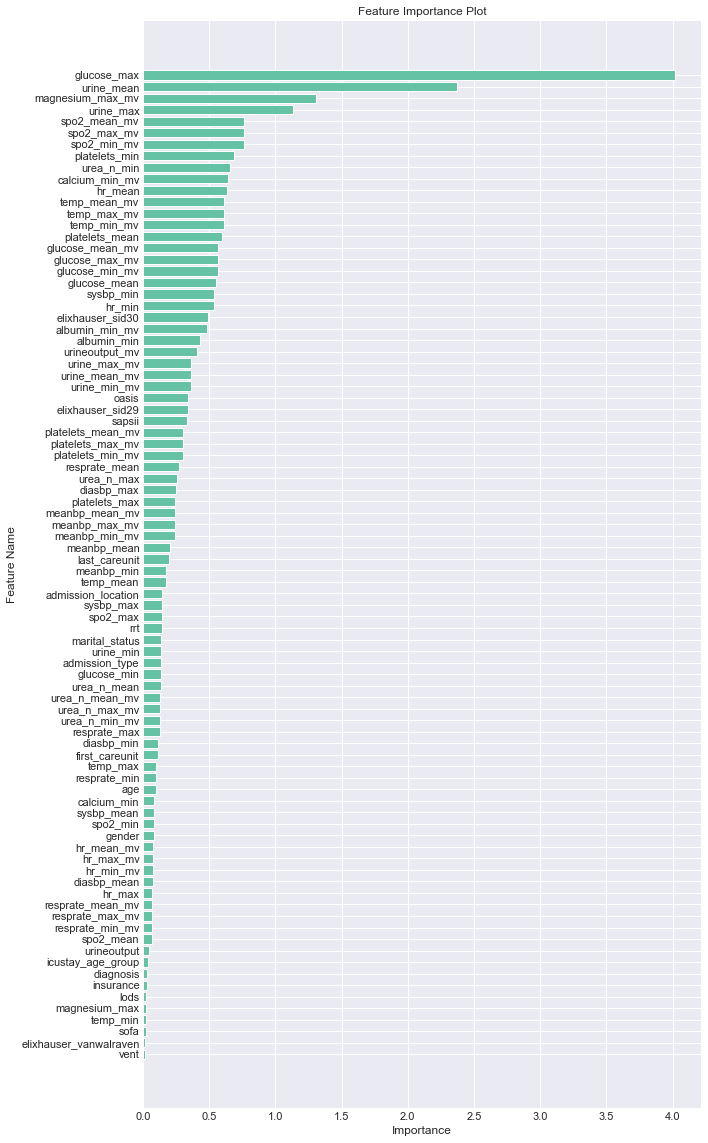

In [16]:
names = X_test.columns.tolist()
values = np.abs(clf.coef_[0])
feature_importance_bar(names, values, drop_botn=20, figsize=(10, 20))

## Precision Recall Curve

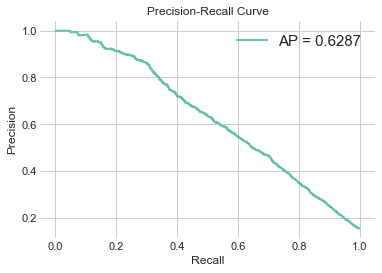

In [10]:
plot_PRC(y_test, y_score)

## ROC Curve

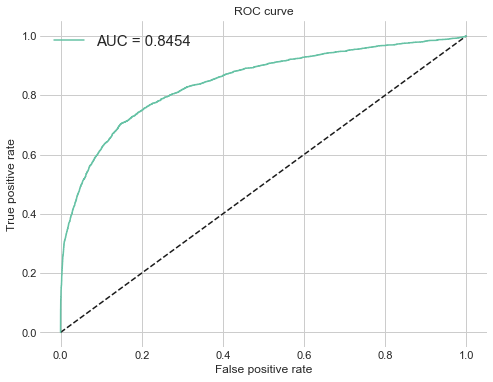

In [11]:
plot_ROC(y_test, y_score)

## Confusion Matris

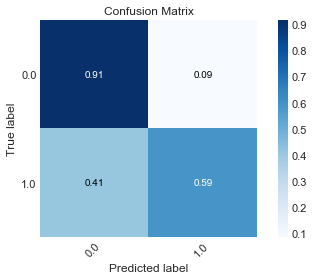

In [12]:
plot_cm(y_test, y_score)